In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.optimize import minimize


In [16]:
# Integrates forward T multiples of the driving period, with an initial condtion r0 Returns array with the trajectory.
#Seems to work on the correct parameters fo example in ex.1 but breaks in ex.2

def Duff(r0,T):
    #Parameters
    b = 0.125
    g = 0.3
    omega = 1
    # no. poincare points:
    nu = 1
    # no. data points per cycle
    dens = 3000
    #Integration of trajectory
    def f(r,t):
        x = r[0]
        y = r[1]
        drdt = np.array([ y, -2*b*y + x-x**3 + g*cos(omega*t)])
        return drdt
    tvals = np.linspace(0,2*pi*T,dens*T)
    temp = odeint(f,r0,tvals)
    return np.transpose(temp)

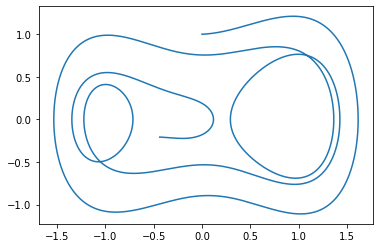

In [18]:
# Example 1.1 (just a check that the integrator works properly)
#works correctly, same output as in file

r0 = np.array([0,1])
ex1 = Duff(r0,5)
plt.plot(ex1[0],ex1[1])
plt.show()


In [90]:
#print(Duff(ex2[0],1)[0][-1])
#print(Duff(ex2[0],1)[1][-1])
intl_cond= np.array([0,0])
listy=[]
listx=[]
def destination_points(list1,list2, init):
    list1.append(Duff(init,1)[0][-1])
    list2.append(Duff(init,1)[1][-1])
    return list1[-1],list2[-1]
    




In [91]:
destination_points(listx,listy,intl_cond)

(0.9946674641625749, 0.31583201285721857)

In [53]:
#listx.append(destination_points(listx,listy,intl_cond)[0])
#listy.append(destination_points(listx,listy,intl_cond)[1])
#print(listx)

[0.9946674641625749, 0.9946674641625749, 0.9946674641625749, 0.9946674641625749]


In [93]:

for i in range(1000):
    destination_points(listx,listy,np.array([listx[-1],listy[-1]]))[0]
    destination_points(listx,listy,np.array([listx[-1],listy[-1]]))[1]


In [96]:
#print(listx)
#print(len(listy))

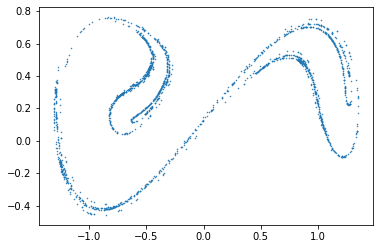

In [95]:
plt.scatter(listx,listy,s=1,marker='.')

In [11]:
#Example 1.2 Poincare section (just another test)
#does not work, something is worng with the parameters
ex2 = [r0]
for i in range(0,1000,1):
    ex2.append(Duff(ex2[0],1)[-1][-1])
    
ex2 = np.transpose(np.array(ex2))
print(ex2[5])
#plt.scatter(ex2[0],ex2[1],s=1,marker='.')
#print(ex2[0])
#print(ex2[1])
#plt.show()


0.31583201285721857


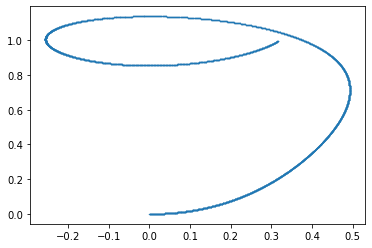

In [12]:
#tried things out with the previous example but not sure that this is valuable

ex2 = [r0]
for i in range(0,1000,1):
    ex2.append(Duff(ex2[0],1)[-1])
    ex2.append(Duff(ex2[0],1)[0])
ex2 = np.transpose(np.array(ex2))
#print(ex2[2])
#print(ex2[1])
plt.scatter(ex2[1],ex2[2],s=1,marker='.')
plt.show()


In [13]:
#B=(np.array([[0,0],[0,0]]))
#CDuff(rfixed,1,B)

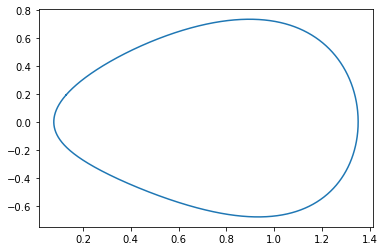

In [59]:
#this also does not work, the result should be an orbit and instead we get a line, I'm not sure of the intent

#Fixed point of poincare section
rfixed = np.array([0.12900567, 0.19367941])
#Trajectory of one orbit
rf_t = Duff(rfixed,1)
#Period in terms of 2 pi
#tau = 1
#print(rf_t[555])
#print(rf_t[1])
#print(rf_t[0])

plt.plot(rf_t[0],rf_t[1])
plt.show()


In [60]:
#these run as they should, it just turning things into arrays in terms of rf_t, our trajectory
#Our standard number of points per driving period
dens = 3000
#For a given t finds the index in rf_t for the point rf(t). The "integer" period of the UPO, tau, needs to be defined.
def index(t):
    return int(floor((t*dens)/(2*pi)%dens))
#For a given t returns array with rf(t)
def rf(t):
    return np.array([rf_t[0][index(t)],rf_t[1][index(t)]])

In [75]:
# The control system integrator. r0: initial condition, T: time in mult. of 2pi, A: 2x2 control matrix.
# Note that the fixed point data, tau and rf_t and the above two functions need to defined.
def CDuff(r0,T,A):
#Parameters
    b = 0.125
    g = 0.3
    omega = 1
    # no. poincare points:
    nu = 1
    # no. data points per cycle
    dens = 3000
    #Integration of trajectory
    def f(r,t):
        x = r[0]
        y = r[1]
        drdt = np.array([ y + A[0,0]*(x - rf(t)[0]) + A[1,0]*(y - rf(t)[1]),
        -2*b*y + x - x**3 + g*cos(omega*t) + A[0,1]*(x - rf(t)[0]) + A[1,1]*(y - rf(t)[1])])
        return drdt
    tvals = np.linspace(0,2*pi*T,dens*T,dtype='float')
    temp = odeint(f,r0,tvals)
    return np.transpose(temp)

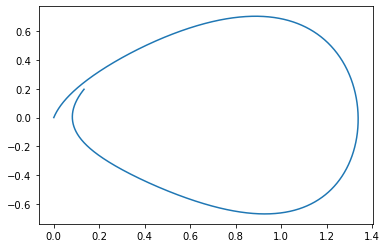

In [76]:

# Example 3.1 trivial control matrix
A_3a = np.array([[-1,0],[0,-1]]) #control matrix
ex_3a = CDuff(r0,1,A_3a)
plt.plot(ex_3a[0],ex_3a[1])
plt.show()


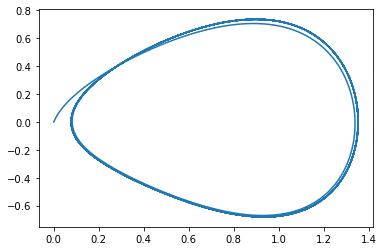

In [77]:
#Example 3.2 A control matrix based on intuition.
#This control matrix basically pushes the state of the system back to the UPO when ever it veers from it.
#A disadvantage of this kind of control is that (unlike OGY) it generally requires a large amount amount of "effort".
A_3b = np.array([[-1,0],
[0,-1]]) #control matrix
ex_3b = CDuff(r0,10,A_3b)
plt.plot(ex_3b[0],ex_3b[1])
plt.show()


In [78]:
#Amount of time we average over.
Ti = 10
#Defining the objective function based on pythons integrator ( very slow!)
def proto1distsq(t,A):
    r_t = CDuff(r0,t,A)
    if len(r_t[0]) == 0: 
        r_t = np.array([[r0[0]],[r0[1]]])
    return (r_t[0][-1] - rf(t)[0])**2 + (r_t[1][-1] - rf(t)[1])**2
def proto1d2av(A):
    return (1/Ti)*quad(lambda t: proto1distsq(t,A), 0, Ti)[0]
#Objective function based on reimann sums
def proto2d2av(A):
    r_t = CDuff(r0,Ti,A)
    dt = (2*pi)/dens
    integral = 0
    for i in range(0,dens*Ti,1):
        integral += dt*((r_t[0][i] - rf_t[0][i%dens])**2 + (r_t[1][i] - rf_t[1][i%dens])**2)
    return (1/Ti)*integral


In [79]:
#Example 4.1: Objective function of trivial control matrix
#1st version of objective function.
proto1d2av(A_3a)


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

In [21]:
proto2d2av(A_3a)


7.76657165995271

In [22]:
#Example 4.2: Objective function of example 3.2
proto2d2av(A_3b)


0.0068606967317053685

In [23]:
# Defining the new matrix
def A_4b(p):
    return np.array([[p,0],[0,p]])
# Creating the data for the plot (note this takes a while to compute).
ex4b = []
for p in np.linspace(-4,0,8):
    ex4b.append(proto2d2av(A_4b(p)))


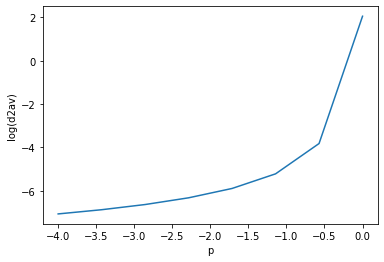

In [24]:
# Creating the plot.
ex4b2 =[]
for i in range(0,len(ex4b),1):
    ex4b2.append([log(ex4b[i]),np.linspace(-4,0,8)[i]])
ex4b2 = np.transpose(np.array(ex4b2))
plt.plot(ex4b2[1],ex4b2[0])
plt.xlabel("p")
plt.ylabel("log(d2av)")
plt.show()

In [80]:
#Here we define the optimisation function with an arbitrary matrix A.
#a = [a11,a12,a21,a22] where aij are the compnents of the matrix A.
def d2av(a):
    A = np.array([[a[0],a[1]],[a[2],a[3]]])
    return proto2d2av(A)


In [81]:
#Our initial guess is the matrix from example 3.2
a0 = [-1,0,0,-1]
#Our constraint (effort cuttoff) is that the sum of absolute values of the components of the matrix is less than or equal to 2.
cons = ({'type': 'ineq', 'fun': lambda a: abs(a[0]) + abs(a[1]) + abs(a[2]) + abs(a[3]) - 2})
#Here the minimisation is performed. This is the the same function that I used to find fixed points
minA = minimize(d2av,a0,method='SLSQP',constraints=cons)

C:\Users\Eugene Surdutovich\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [82]:
minA

     fun: 0.006865490828970533
     jac: array([0.16068079, 8.09343096, 0.17031923, 0.20096936])
 message: 'Optimization terminated successfully'
    nfev: 46
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-9.99005142e-01,  1.21092100e-03, -6.72216712e-04, -1.00079088e+00])

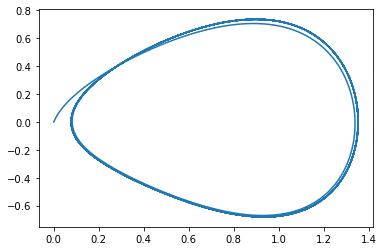

In [85]:
A_opt = np.array([[-1.00671603,-0.01303176], [-0.00726815,-0.99905768]]) #control matrix
traj_opt = CDuff(r0,10,A_3b)
plt.plot(traj_opt[0],traj_opt[1])
plt.show()